In [5]:
#importing libraries

import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
sns.set_style('darkgrid')
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression





In [6]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df=pd.read_excel('/content/drive/MyDrive/DS Data Sets/Forecasting/CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [11]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [14]:
df.shape

(42, 2)

In [15]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<Axes: >

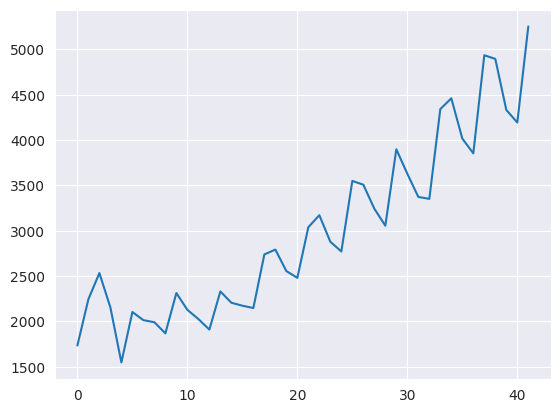

In [16]:
df.Sales.plot()

In [18]:
Train=df.head(30)
Test=df.tail(10)

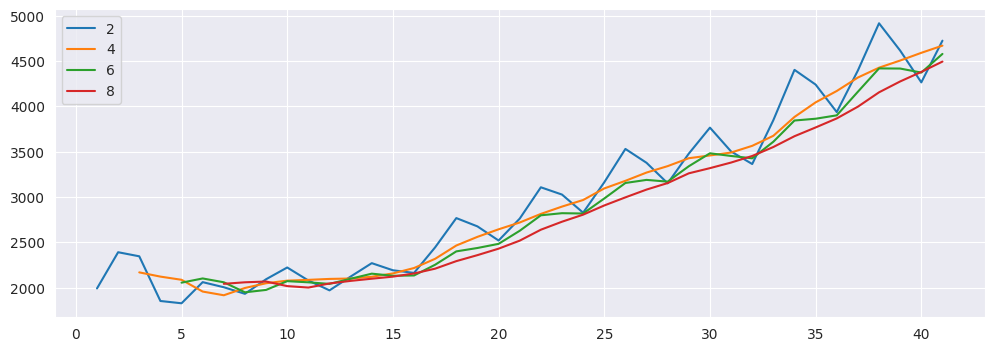

In [20]:
plt.figure(figsize=(12,4))
for i in range (2,9,2):
  df['Sales'].rolling(i).mean().plot(label=str(i))

plt.legend(loc='best')

In [19]:
temp=df.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')


In [21]:
df['quater']=pd.to_datetime(temp).dt.strftime('%b-%Y')
df.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [22]:
df=df.drop(['Quarter'],axis=1)
df.reset_index(inplace=True)
df['quater']=pd.to_datetime(df['quater'])

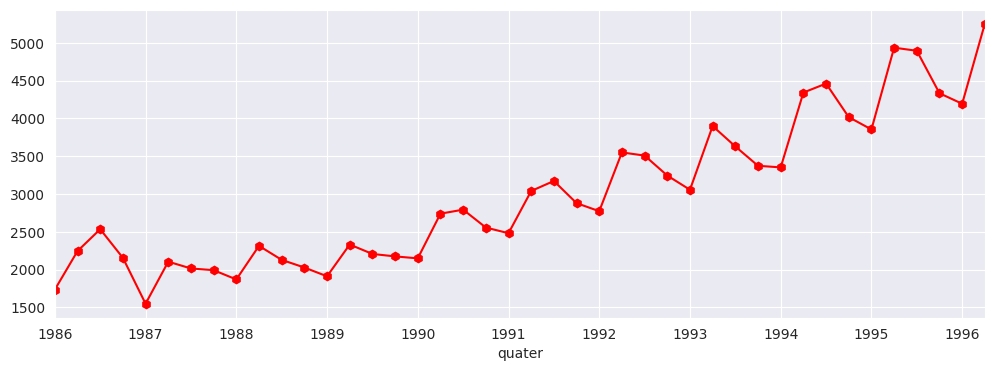

In [27]:
df['Sales'].plot(figsize=(12,4),color='red',marker='h')
plt.show()

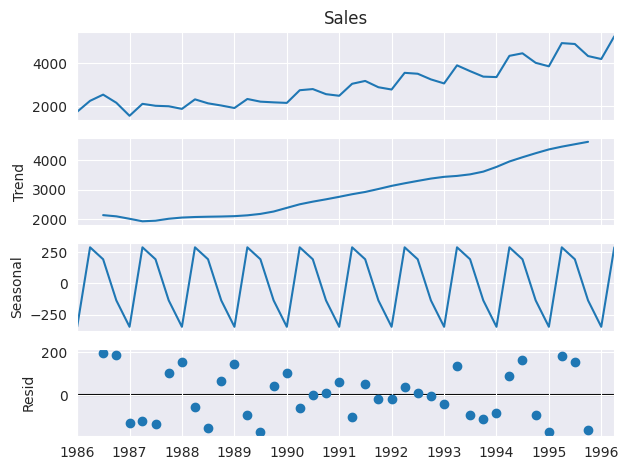

In [28]:
ts_add=seasonal_decompose(df.Sales,model='additive')
fig=ts_add.plot()
plt.show()

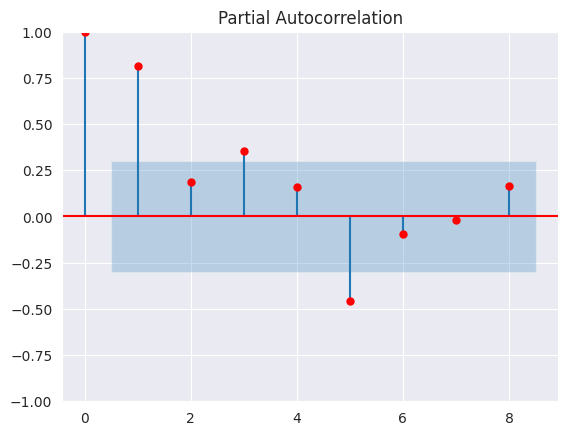

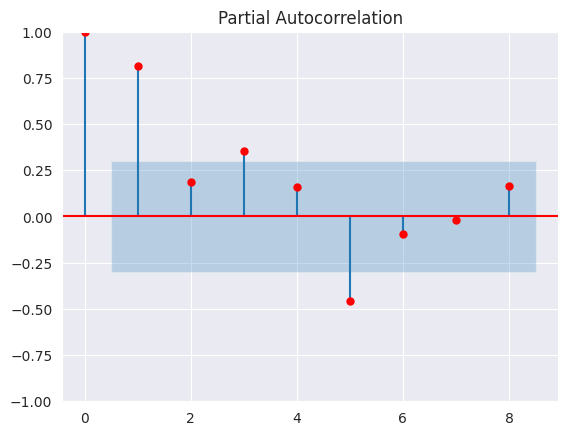

In [33]:
plot_pacf(df.Sales,lags=8,color='red')

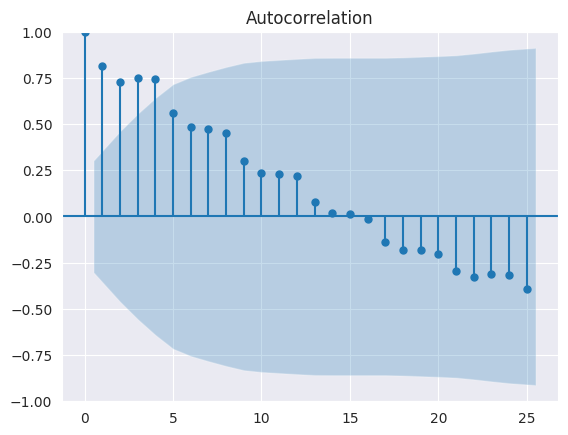

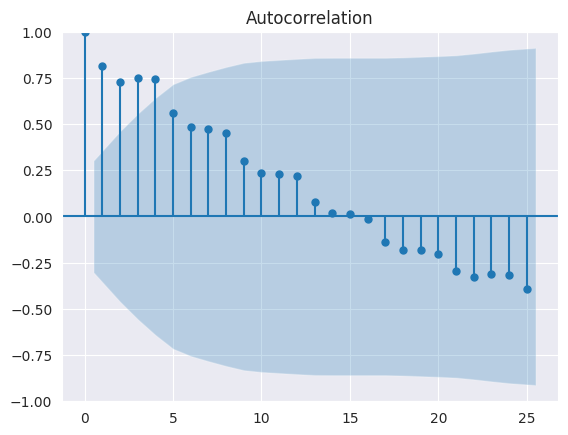

In [35]:
plot_acf(df.Sales,lags=25)

In [36]:
# Time Series Forecasting
x=df['Sales'].values
size=int(len(x)*0.66)
train,test=x[0:size],x[size:len(x)]

In [38]:
model=ARIMA(train,order=(5,1,0))
model_fit=model.fit()

In [39]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Mon, 19 Feb 2024   AIC                            360.163
Time:                        15:13:24   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

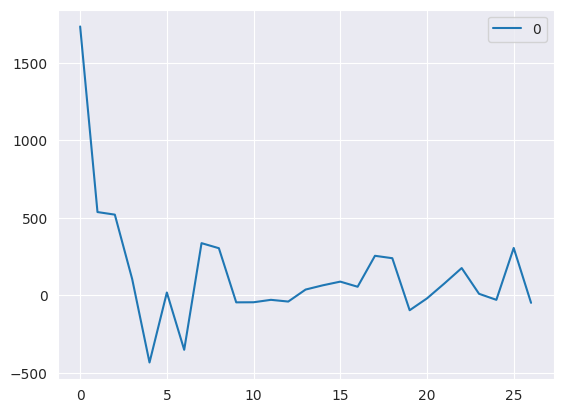

In [42]:
import matplotlib.pyplot as plt
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [43]:
residuals.describe()

,0
count,27.000000
mean,137.791854
std,385.970462
min,-433.659591
25%,-34.938856
50%,55.067398
75%,247.080157
max,1734.827000


In [44]:
# Rolling Forecast
history=[x for x in train]
predictions=list()

In [45]:
for t in range (len(test)):
  model=ARIMA(history,order=(5,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f,expected=%f' %(yhat,obs))

predicted=3130.132560,expected=3243.859993
predicted=3167.315971,expected=3056.000000
predicted=3717.472606,expected=3899.000000
predicted=3775.837500,expected=3629.000000
predicted=3332.744953,expected=3373.000000
predicted=3258.575374,expected=3352.000000
predicted=4081.006044,expected=4342.000000
predicted=3955.784129,expected=4461.000000
predicted=4146.277764,expected=4017.000000
predicted=3958.436605,expected=3854.000000
predicted=4701.652928,expected=4936.000000
predicted=4990.071243,expected=4895.000000
predicted=4390.352764,expected=4333.000000
predicted=4190.945470,expected=4194.000000
predicted=5177.006981,expected=5253.000000


In [46]:
error=mean_squared_error(test,predictions)
error

34279.907720440795

In [47]:
t=np.arange(1,43)
df['t']=t

In [50]:
df['t_squared']=df['t']*df['t']
log_Sales=np.log(df['Sales'])
df['log_Sales']=log_Sales
df.head().T


quater,1986-01-01,1986-04-01,1986-07-01,1986-10-01,1987-01-01
index,0.000000,1.000000,2.000000,3.000000,4.000000
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
t,1.000000,2.000000,3.000000,4.000000,5.000000
t_squared,1.000000,4.000000,9.000000,16.000000,25.000000
log_Sales,7.458663,7.716443,7.837477,7.675529,7.344602
